## **Fundamentos de Data Science**
## Analizando la Satisfacción de Clientes en la Industria Hotelera

**Requisitos:**

Tu tarea es limpiar y explorar un dataset que contiene información sobre la satisfacción de los clientes en la industria hotelera. Este análisis es crucial para los ejecutivos de la empresa que buscan entender mejor las opiniones y experiencias de sus clientes para mejorar los servicios ofrecidos.

El dataset puede ser encontrado aquí.

# 1.Limpieza de datos con Python:

* Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
* Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).
Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
* Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).
# 2.Exploración de datos con Python:
* Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
# 3.Análisis adicional:
* Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
* Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

In [6]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import json
import re

In [8]:
path = '../content/hotel_bookings.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Limpieza de datos
Verificacion y eliminación de valores duplicados

In [9]:
# Identificando valores duplicados
duplicados = df.duplicated()

# Conteo del número de valores duplicados
val_duplicados = duplicados.sum()
print(f"Número de duplicados: {val_duplicados}")
df.head()

Número de duplicados: 31994


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Verificacion y ajuste de los tipos de datos

In [10]:
# Tipo de datos

diccionario = {
  'hotel' : 'object',
  'is_canceled' : 'int64',
  'lead_time' : 'int64',
  'stays_in_weekend_nights' : 'int64',
  'stays_in_week_nights' : 'int64',
  'adults' : 'int64',
  'children' : 'float64',
  'babies' : 'int64',
  'meal' : 'object',
  'country' : 'object',
  'market_segment' : 'object',
  'distribution_channel' : 'object',
  'is_repeated_guest' : 'int64',
  'previous_cancellations' : 'int64',
  'previous_bookings_not_canceled' : 'int64',
  'reserved_room_type' : 'object',
  'assigned_room_type' : 'object',
  'booking_changes' : 'int64',
  'deposit_type' : 'object',
  'agent' : 'float64',
  'company' : 'float64',
  'days_in_waiting_list' : 'int64',
  'customer_type' : 'object',
  'adr' : 'float64',
  'required_car_parking_spaces' : 'float64',
  'total_of_special_requests' : 'float64',
  'reservation_status' : 'object',
  'reservation_status_date' : 'object',
}

In [11]:
# Mapeo de datos
def map_tipo(tipo_personalizado):
    mapping = {
        'object' : 'object',
        'int64' : 'int64',
        'float64': 'float64',
    }
    return mapping.get(tipo_personalizado, 'object')

# Diccionario pandas
diccionario_mapeado = {col: map_tipo(tipo) for col, tipo in diccionario.items()}

print("Diccionario Mapeado para pandas:")
print(diccionario_mapeado)

Diccionario Mapeado para pandas:
{'hotel': 'object', 'is_canceled': 'int64', 'lead_time': 'int64', 'stays_in_weekend_nights': 'int64', 'stays_in_week_nights': 'int64', 'adults': 'int64', 'children': 'float64', 'babies': 'int64', 'meal': 'object', 'country': 'object', 'market_segment': 'object', 'distribution_channel': 'object', 'is_repeated_guest': 'int64', 'previous_cancellations': 'int64', 'previous_bookings_not_canceled': 'int64', 'reserved_room_type': 'object', 'assigned_room_type': 'object', 'booking_changes': 'int64', 'deposit_type': 'object', 'agent': 'float64', 'company': 'float64', 'days_in_waiting_list': 'int64', 'customer_type': 'object', 'adr': 'float64', 'required_car_parking_spaces': 'float64', 'total_of_special_requests': 'float64', 'reservation_status': 'object', 'reservation_status_date': 'object'}


In [12]:
def validar_tipos(df, diccionario):
  mismatches = []
  for columna, tipo_esperado in diccionario.items():
        if columna in df.columns:
            tipo_actual = str(df[columna].dtype)
            if tipo_esperado.startswith('datetime') and tipo_actual.startswith('datetime'): continue
            elif tipo_actual != tipo_esperado:
                mismatches.append((columna, tipo_actual, tipo_esperado))
        else:
            mismatches.append((columna, 'No existe en el DataFrame', tipo_esperado))
  return mismatches

mismatches = validar_tipos(df, diccionario_mapeado)

if not mismatches:
    print("Datos correctos.")
else:
    print("Divergencia en datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Divergencia en datos:
- Columna 'required_car_parking_spaces': Tipo actual -> int64, Tipo esperado -> float64
- Columna 'total_of_special_requests': Tipo actual -> int64, Tipo esperado -> float64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Consistencia en valores categóricos

In [14]:
# Lista de columnas a ser inspeccionadas
categorical_cols = ['hotel', 'country', 'market_segment', 'customer_type']

# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()
    valores_unicos[col] = unique_vals
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_vals)

# Ruta donde se guardará el archivo JSON
ruta_json = '../content/valores_unicos_iniciales.json'

# Guardar el diccionario en un archivo JSON
with open(ruta_json, 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print(f"\nValores únicos guardados en '{ruta_json}'")


Valores únicos en la columna 'hotel':
['Resort Hotel', 'City Hotel']

Valores únicos en la columna 'country':
['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA', 

In [16]:
# Limpieza de cadenas
def limpiar_cadena(cadena):

    if isinstance(cadena, str):
        cadena = cadena.lower()
        primer_letra = re.search(r'[a-z]', cadena)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)

        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            cadena = cadena.strip()

        return cadena
    return cadena


# Aplicar la limpieza a las columnas categóricas
for col in categorical_cols:
    df[col] = df[col].apply(limpiar_cadena)
# Verificar los cambios
for col in categorical_cols:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(df[col].unique())


Valores únicos después de limpieza en 'hotel':
['resort hotel' 'city hotel']

Valores únicos después de limpieza en 'country':
['prt' 'gbr' 'usa' 'esp' 'irl' 'fra' nan 'rou' 'nor' 'omn' 'arg' 'pol'
 'deu' 'bel' 'che' 'cn' 'grc' 'ita' 'nld' 'dnk' 'rus' 'swe' 'aus' 'est'
 'cze' 'bra' 'fin' 'moz' 'bwa' 'lux' 'svn' 'alb' 'ind' 'chn' 'mex' 'mar'
 'ukr' 'smr' 'lva' 'pri' 'srb' 'chl' 'aut' 'blr' 'ltu' 'tur' 'zaf' 'ago'
 'isr' 'cym' 'zmb' 'cpv' 'zwe' 'dza' 'kor' 'cri' 'hun' 'are' 'tun' 'jam'
 'hrv' 'hkg' 'irn' 'geo' 'and' 'gib' 'ury' 'jey' 'caf' 'cyp' 'col' 'ggy'
 'kwt' 'nga' 'mdv' 'ven' 'svk' 'fji' 'kaz' 'pak' 'idn' 'lbn' 'phl' 'sen'
 'syc' 'aze' 'bhr' 'nzl' 'tha' 'dom' 'mkd' 'mys' 'arm' 'jpn' 'lka' 'cub'
 'cmr' 'bih' 'mus' 'com' 'sur' 'uga' 'bgr' 'civ' 'jor' 'syr' 'sgp' 'bdi'
 'sau' 'vnm' 'plw' 'qat' 'egy' 'per' 'mlt' 'mwi' 'ecu' 'mdg' 'isl' 'uzb'
 'npl' 'bhs' 'mac' 'tgo' 'twn' 'dji' 'stp' 'kna' 'eth' 'irq' 'hnd' 'rwa'
 'khm' 'mco' 'bgd' 'imn' 'tjk' 'nic' 'ben' 'vgb' 'tza' 'gab' 'gha' 'tmp'

##Manejo de valores faltantes

Identificacion y manejo de todos los valores faltantes dentro del dataset.

In [17]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
company,6797,112593,94.31
agent,103050,16340,13.69
country,118902,488,0.41
hotel,119390,0,0.00
previous_cancellations,119390,0,0.00
reservation_status,119390,0,0.00
total_of_special_requests,119390,0,0.00
required_car_parking_spaces,119390,0,0.00
adr,119390,0,0.00
customer_type,119390,0,0.00


In [18]:
#  Definir las columnas categóricas, numéricas y de fecha
categorical_cols = ['hotel', 'country', 'market_segment', 'arrival_date_month', 'meal', 'distribution_channel', 'customer_type', 'reservation_status']
numeric_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'agent', 'adr']
date_cols = ['reservation_status_date']
# Rellenar valores faltantes en columnas categóricas
df[categorical_cols] = df[categorical_cols].fillna('Desconocido')
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
company,6797,112593,94.31
agent,103050,16340,13.69
hotel,119390,0,0.00
is_canceled,119390,0,0.00
reservation_status,119390,0,0.00
total_of_special_requests,119390,0,0.00
required_car_parking_spaces,119390,0,0.00
adr,119390,0,0.00
customer_type,119390,0,0.00
days_in_waiting_list,119390,0,0.00


In [36]:
# Definir las columnas categóricas y numéricas
categorical_cols = ['hotel', 'country', 'market_segment', 'arrival_date_month', 'meal', 'distribution_channel', 'customer_type', 'reservation_status']
numeric_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'agent', 'adr']

# Filtrar el DataFrame para incluir solo filas sin valores faltantes en las columnas categóricas y numéricas
df_filtered = df.dropna(subset=categorical_cols + numeric_cols)

# Mostrar cuántas filas fueron eliminadas
num_original = df.shape[0]
num_filtrado = df_filtered.shape[0]
print(f"Filas originales: {num_original}")
print(f"Filas después de filtrar valores faltantes: {num_filtrado}")
print(f"Filas eliminadas: {num_original - num_filtrado}")

# Agrupar por las columnas categóricas y calcular la media, std, median y count
grouped_df = df_filtered.groupby(categorical_cols)[numeric_cols].agg(['mean', 'std', 'median', 'count'])

# Aplanar el MultiIndex de las columnas resultantes
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]

# Restablecer el índice para convertir las columnas categóricas de nuevo en columnas normales
grouped_df = grouped_df.reset_index()

# Calcular el coeficiente de variación para cada variable numérica
for col in numeric_cols:
    std_col = f"{col}_std"
    mean_col = f"{col}_mean"
    cv_col = f"{col}_cv"

# Evitar división por cero
grouped_df[cv_col] = grouped_df[std_col] / grouped_df[mean_col].replace({0: pd.NA})

# Reemplazar NaN en coeficiente de variación con 0 o algún otro valor si es necesario
grouped_df.fillna({'lead_time': 0,
                   'stays_in_weekend_nights': 0,
                   'stays_in_week_nights': 0,
                   'adults': 0,
                   'children': 0,
                   'babies': 0,
                   'agent': 0,
                   'adr' : 0}, inplace=True)

# Guardar el DataFrame agrupado como un archivo CSV
grouped_df.to_csv('../content/estadisticas_agrupadas_sin_NA.csv', index=False)
print("\nEstadísticas agrupadas guardadas en 'estadisticas_agrupadas_sin_NA.csv'.")

# Mostrar las primeras filas del DataFrame agrupado
print("\nPrimeras filas del DataFrame agrupado:")
grouped_df[grouped_df.lead_time_count>1]

Filas originales: 119390
Filas después de filtrar valores faltantes: 103048
Filas eliminadas: 16342

Estadísticas agrupadas guardadas en 'estadisticas_agrupadas_sin_NA.csv'.

Primeras filas del DataFrame agrupado:


,hotel,country,market_segment,arrival_date_month,meal,distribution_channel,customer_type,reservation_status,lead_time_mean,lead_time_std,...,babies_count,agent_mean,agent_std,agent_median,agent_count,adr_mean,adr_std,adr_median,adr_count,adr_cv
2,city hotel,Desconocido,offline ta/to,October,BB,TA/TO,transient,Canceled,193.000000,0.000000,...,14,12.000000,0.000000,12.0,14,65.000000,0.000000,65.00,14,0.0
7,city hotel,ago,corporate,October,BB,Corporate,transient-party,Check-Out,11.000000,0.000000,...,2,95.000000,0.000000,95.0,2,100.000000,0.000000,100.00,2,0.0
15,city hotel,ago,direct,December,SC,Direct,transient,Canceled,25.500000,10.847427,...,4,14.000000,0.000000,14.0,4,88.500000,0.577350,88.50,4,0.006524
16,city hotel,ago,direct,February,BB,Direct,transient,Canceled,22.500000,0.707107,...,2,14.000000,0.000000,14.0,2,153.000000,56.568542,153.00,2,0.369729
18,city hotel,ago,direct,February,SC,Direct,transient-party,No-Show,2.000000,0.000000,...,9,14.000000,0.000000,14.0,9,79.222222,0.440959,79.00,9,0.005566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9436,resort hotel,ven,online ta,November,BB,TA/TO,transient,Check-Out,9.500000,12.020815,...,2,240.000000,0.000000,240.0,2,55.200000,12.445079,55.20,2,0.225454
9441,resort hotel,zaf,online ta,April,BB,TA/TO,transient,Check-Out,141.000000,100.409163,...,2,240.500000,0.707107,240.5,2,78.760000,28.623683,78.76,2,0.363429
9444,resort hotel,zaf,online ta,December,BB,TA/TO,transient,Check-Out,117.333333,65.041013,...,3,240.333333,0.577350,240.0,3,39.103333,14.553008,32.40,3,0.372168
9447,resort hotel,zaf,online ta,July,BB,TA/TO,transient-party,Check-Out,118.000000,0.000000,...,2,240.000000,0.000000,240.0,2,190.000000,14.142136,190.00,2,0.074432


In [34]:
# Filtro de datos donde existen observaciones:
filtered_grouped_df = grouped_df[grouped_df['lead_time_count'] > 1]
median_cols = [f"{col}_median" for col in numeric_cols]
cv_cols = [f"{col}_cv" for col in numeric_cols]
selected_columns = categorical_cols + median_cols + cv_cols
selected_grouped_df = filtered_grouped_df[selected_columns]
selected_grouped_df.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time_median,5809.0,84.451196,76.180051,0.0,27.00,63.0,122.000000,542.000000
stays_in_weekend_nights_median,5809.0,1.043295,0.855862,0.0,0.00,1.0,2.000000,7.000000
stays_in_week_nights_median,5809.0,2.677483,1.623132,0.0,2.00,2.0,3.000000,19.000000
adults_median,5809.0,1.899552,0.466073,0.0,2.00,2.0,2.000000,26.000000
children_median,5809.0,0.067395,0.274572,0.0,0.00,0.0,0.000000,5.000000
babies_median,5809.0,0.003529,0.044840,0.0,0.00,0.0,0.000000,1.000000
agent_median,5809.0,95.956103,111.485252,1.0,9.00,14.0,240.000000,535.000000
adr_median,5809.0,105.380287,43.508738,0.0,76.27,99.2,128.700000,319.000000
agent_cv,5809.0,0.238505,0.518748,0.0,0.00,0.0,0.142311,6.494722


# Exploracion de datos con Python

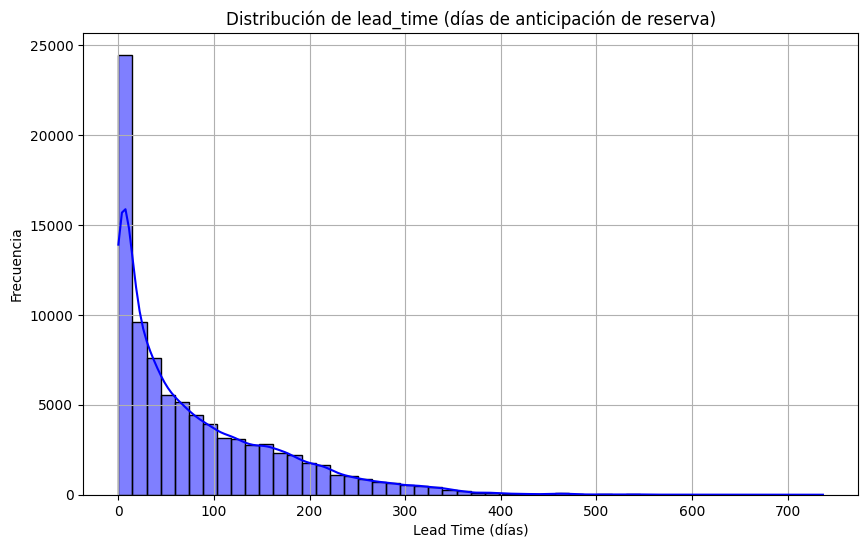

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización univariada 1: Distribución de "lead_time" (días entre la reserva y la llegada)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['lead_time'], bins=50, kde=True, color='blue')
plt.title('Distribución de lead_time (días de anticipación de reserva)')
plt.xlabel('Lead Time (días)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La mayoría de las reservas se realizan con un tiempo de anticipación entre 0 y 200 días. Sin embargo, existe una pequeña cola hacia tiempos de anticipación mucho mayores, lo que indica que algunos clientes planifican con mucha antelación las reservas a ser realizadas para sus viajes.

<ipython-input-41-2ffe4ce1d470>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='hotel', palette='Set2')


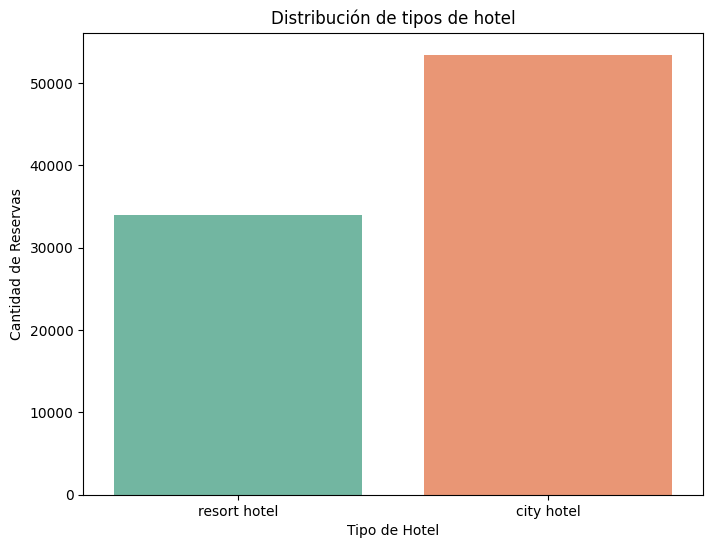

In [41]:
# Visualización univariada 2: Conteo de tipos de hotel
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='hotel', palette='Set2')
plt.title('Distribución de tipos de hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de Reservas')
plt.show()

Los datos muestran una ligera mayor cantidad de reservas en hoteles "City Hotel" en comparación con "Resort Hotel", lo que podría reflejar la preferencia de los clientes por hoteles en entornos urbanos de las grandes ciudades.

# Fuentes de consulta:
- Chat GPT
- Github.com
- Claude AI
- Anotaciones de clases Prof. Iair Linker
- Foro de stackoverflow